In [31]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")
import os
os.chdir(r'C:\Users\Hp\Downloads\Forecasting')

In [32]:
data=pd.read_csv("india.csv") 
data.columns

Index(['Datetime', 'Confirmed'], dtype='object')

In [33]:
data

,Datetime,Confirmed
0,2020-01-30T13:33:00.00+05:30,1
1,2020-02-02T10:39:00.00+05:30,2
2,2020-02-03T12:13:00.00+05:30,3
3,2020-03-02T14:28:00.00+05:30,5
4,2020-03-03T19:36:00.00+05:30,6
5,2020-03-10T12:00:00.00+05:30,47
6,2020-03-11T17:30:00.00+05:30,60
7,2020-03-12T11:00:00.00+05:30,73
8,2020-03-12T18:00:00.00+05:30,74
9,2020-03-13T10:00:00.00+05:30,75


In [34]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
logistic_function = lambda x, a, b, c, d: \
    a / (1 + np.exp(-c * (x - d))) + b

In [35]:
from statsmodels.tools.tools import add_constant
x = np.arange(len(confirmed))
x = add_constant(x)

In [36]:
confirmed = data['Confirmed']
confirmed = np.array(confirmed)
x = x[:, 1]

In [37]:
(confirmed)

array([    1,     2,     3,     5,     6,    47,    60,    73,    74,
          75,    79,    83,    84,    93,   107,   107,   110,   114,
         125,   125,   126,   137,   147,   151,   166,   167,   173,
         195,   223,   258,   283,   324,   324,   360,   390,   390,
         433,   434,   492,   519,   519,   562,   606,   649,   694,
         724,   873,   909,   979,  1024,  1071,  1205,  1359,  1637,
        1834,  1965,  2069,  2283,  2470,  2902,  3072,  3374,  3577,
        4067,  4281,  4421,  4789,  5194,  5274,  5734,  5865,  6412,
        6761,  7447,  7529,  8356,  8447,  9152,  9352, 10363, 10815,
       11439, 11933, 12380, 12759, 13387, 13835, 14378, 14792, 15712,
       16116, 17265, 17656, 18601, 18985, 19984, 20471, 21393, 21700,
       23077, 23452, 24506, 24893, 26496, 26605, 27892, 28160, 29435],
      dtype=int64)

In [38]:
import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")
(a_, b_, c_, d_), _ = curve_fit(logistic_function, x, confirmed)

In [39]:
(a_, b_, c_, d_)

(44759.38660116353,
 -243.29537473913535,
 0.06615551260027003,
 97.73155281849661)

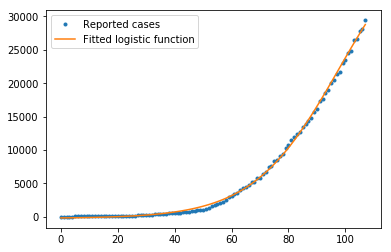

In [40]:
def plot_logistic_fit(confirmed, logistic_params):
    a_, b_, c_, d_ = logistic_params
    x = np.arange(0, len(confirmed))
    plt.plot(x, confirmed, ".", label="Reported cases")
    confirmed_pred = logistic_function(x, a_, b_, c_, d_)
    plt.plot(x, confirmed_pred, label="Fitted logistic function")
    plt.legend()
    plt.show()
    return confirmed_pred
confirmed_pred = plot_logistic_fit(confirmed, (a_, b_, c_, d_))

In [41]:
r2_score(confirmed, confirmed_pred)

0.9990289358963251

In [42]:
def plateau(confirmed, logistic_params, diff):
    a_, b_, c_, d_ = logistic_params 
    confirmed_now = confirmed[-1]
    print(confirmed_now)
    confirmed_then = confirmed[-2]
    print(confirmed_then)
    days = 0
    now = x[-1]
    print(now)
    while confirmed_now - confirmed_then > diff:
        print(confirmed_now - confirmed_then)
        days += 1
        confirmed_then = confirmed_now
        confirmed_now = logistic_function(
            now + days,
            a_,
            b_,
            c_,
            d_,   
        )
        print(confirmed_now) 
    return days, confirmed_now
#days, confirmed_now = plateau(confirmed, (a_, b_, c_, d_),10)
#print(f"In {days} days the number of infected people will plateau at {int(confirmed_now)}")

In [43]:
x = np.arange(0, len(confirmed))
params, _ = curve_fit(logistic_function, x, confirmed)


In [44]:
params

array([ 4.47593866e+04, -2.43295375e+02,  6.61555126e-02,  9.77315528e+01])

In [50]:
diff = 22
days, cases = plateau(confirmed, params, diff=diff)
print(f"{days} days until growth is lower than {diff} per day")
#print(f"The total cases will be at {int(cases)}")

29435
28160
107
1275
29458.39165660153
23.391656601528666
30112.10940383901
653.7177472374824
30750.59976159633
638.4903577573205
31373.041769035543
622.442007439211
31978.72354926939
605.6817802338483
32567.04228792979
588.3187386604004
33137.502918265534
570.4606303357432
33689.71563225816
552.2127139926233
34223.39235209067
533.6767198325106
34738.34230596368
514.9499538730088
35234.466856995634
496.1245510319568
35711.753734201346
477.2868772057118
36170.270810871065
458.51707666971924
36610.15956870194
439.8887578308786
37031.62837643311
421.4688077311657
37434.945700171185
403.3173237380761
37820.433349702485
385.4876495313001
38188.459851455125
368.0265017526399
38539.43402491381
350.974173458686
38873.79882563803
334.36480072421546
39192.025504946156
318.22667930812895
39494.60812407505
302.5826191288943
39782.05844940454
287.4503253294897
40054.90124527468
272.84279587014316
40313.669972088006
258.76872681332316
40558.90288979315
245.23291770514334
40791.139560466116
232.23667

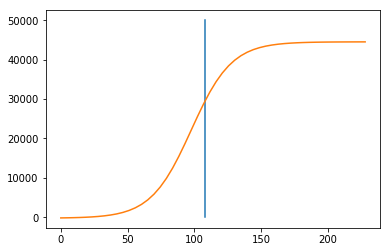

In [58]:
x = np.linspace(0, len(confirmed) + 120)
y = logistic_function(x, *params)
plt.plot([len(confirmed), len(confirmed)], [0, 50000])
plt.plot(x, y)
plt.show()

0.9987535100313263


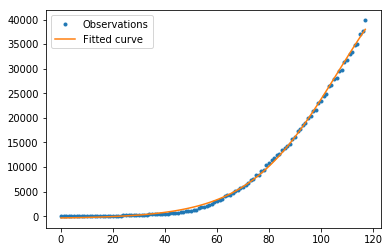

[ 5.92975848e+04 -4.62135005e+02  5.76536982e-02  1.06359123e+02]
1 days until growth is less than 1
Number of cases will be 38778


In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


def logistic_function(x, a=1, b=0, c=1, d=0):
    return a / (1 + np.exp(-c * (x - d))) + b


def exponential_function(x, a=1, b=0, c=0, d=0):
    return a * np.exp(c * (x + d)) + b


def fit_data_to_function(
    x, y, function, plot=True, initial_guess=[1, 1, 1, 1]
):
    params, _ = curve_fit(function, x, y, p0=initial_guess)
    plt.plot(x, y, ".", label="Observations")
    y_fit = function(x, *params)
    print(r2_score(y, y_fit))
    if plot:
        plt.plot(x, y_fit, label="Fitted curve")
        plt.legend()
        plt.show()
    return params


def plateau(x, y, params, function, diff=10):
    confirmed_now = y[-1]
    confirmed_then = y[-2]
    days = 0
    now = x[-1]
    while confirmed_now - confirmed_then > diff:
        days += 1
        confirmed_then = confirmed_now
        confirmed_now = function(now + days, *params)

    return days, confirmed_now


if __name__ == "__main__":
    import os
    os.chdir(r'C:\Users\Hp\Downloads\Forecasting')
    data=pd.read_csv("india.csv") 
    y = np.asarray(data["Confirmed"])
    x = np.arange(len(y))

    params = fit_data_to_function(
        x, y, logistic_function, initial_guess=[y[-1], 1, 1, 1]
    )
    print(params)
    diff = 1
    #params =  (8.32211179e+04, -7.97638229e+02,  2.21206368e-01,  2.31178356e+01)
    days, confirmed = plateau(
        x, y, params, logistic_function, diff=diff
    )
    print(f"{days} days until growth is less than {diff}")
    print(f"Number of cases will be {int(confirmed)}")


0.9979418389026149


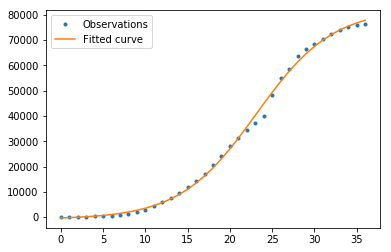

[ 8.32211179e+04 -7.97638229e+02  2.21206368e-01  2.31178356e+01]
33 days until growth is less than 1
Number of cases will be 82420


In [27]:
import numpy as np
from matplotlib import pyplot as plt
import json
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


def logistic_function(x, a=1, b=0, c=1, d=0):
    return a / (1 + np.exp(-c * (x - d))) + b


def exponential_function(x, a=1, b=0, c=0, d=0):
    return a * np.exp(c * (x + d)) + b


def fit_data_to_function(
    x, y, function, plot=True, initial_guess=[1, 1, 1, 1]
):
    params, _ = curve_fit(function, x, y, p0=initial_guess)
    plt.plot(x, y, ".", label="Observations")
    y_fit = function(x, *params)
    print(r2_score(y, y_fit))
    if plot:
        plt.plot(x, y_fit, label="Fitted curve")
        plt.legend()
        plt.show()
    return params


def plateau(x, y, params, function, diff=10):
    confirmed_now = y[-1]
    confirmed_then = y[-2]
    days = 0
    now = x[-1]
    while confirmed_now - confirmed_then > diff:
        days += 1
        confirmed_then = confirmed_now
        confirmed_now = function(now + days, *params)

    return days, confirmed_now


if __name__ == "__main__":
    with open("./covid_data.json", "r") as file:
        data = json.load(file)

    y = np.asarray(data["china"])
    x = np.arange(len(y))

    params = fit_data_to_function(
        x, y, logistic_function, initial_guess=[y[-1], 1, 1, 1]
    )
    print(params)
    diff = 1
    days, confirmed = plateau(
        x, y, params, logistic_function, diff=diff
    )
    print(f"{days} days until growth is less than {diff}")
    print(f"Number of cases will be {int(confirmed)}")
